# **Music Recommendation System**

## **Data Dictionary**

The core data is the Taste Profile Subset released by the Echo Nest as part of the Million Song Dataset. There are two files in this dataset. The first file contains the details about the song id, titles, release, artist name, and the year of release. The second file contains the user id, song id, and the play count of users.

**song_data**

- song_id - A unique id given to every song
- title - Title of the song
- Release - Name of the released album
- Artist_name - Name of the artist
- year - Year of release

**count_data**

- user _id - A unique id given to the user
- song_id - A unique id given to the song
- play_count - Number of times the song was played

## **Data Source**
http://millionsongdataset.com/

### **Importing Libraries and the Dataset**

In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
# Used to ignore the warning given as output of the code
import warnings
warnings.filterwarnings('ignore')

# Basic libraries of python for numeric and dataframe computations
import numpy as np
import pandas as pd

# Basic library for data visualization
import matplotlib.pyplot as plt

# Slightly advanced library for data visualization
import seaborn as sns

# To compute the cosine similarity between two vectors
from sklearn.metrics.pairwise import cosine_similarity

# A dictionary output that does not raise a key error
from collections import defaultdict

# A performance metrics in sklearn
from sklearn.metrics import mean_squared_error

### **Load the dataset**

In [59]:
#importing the datasets
count_df = pd.read_csv('/content/drive/MyDrive/Music Project/count_data.csv')
song_df = pd.read_csv('/content/drive/MyDrive/Music Project/song_data.csv')

### **Understanding the data by viewing a few observations**

In [60]:
# Display the first 10 records of count_df
count_df.head(10)


,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
5,5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5
6,6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1
7,7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1
8,8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1
9,9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1


In [61]:
# Display the first 10 records of song_df
song_df.head(10)


,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
5,SOZVAPQ12A8C13B63C,"Symphony No. 1 G minor ""Sinfonie Serieuse""/All...",Berwald: Symphonies Nos. 1/2/3/4,David Montgomery,0
6,SOQVRHI12A6D4FB2D7,We Have Got Love,Strictly The Best Vol. 34,Sasha / Turbulence,0
7,SOEYRFT12AB018936C,2 Da Beat Ch'yall,Da Bomb,Kris Kross,1993
8,SOPMIYT12A6D4F851E,Goodbye,Danny Boy,Joseph Locke,0
9,SOJCFMH12A8C13B0C2,Mama_ mama can't you see ?,March to cadence with the US marines,The Sun Harbor's Chorus-Documentary Recordings,0


### **Let us check the data types and and missing values of each column**

In [62]:
# Display the info of count_df

# Check the data types of each column
print("Data Types:\n", count_df.dtypes)

# Check the missing values in each column
print("\nMissing Values:\n", count_df.isnull().sum())



Data Types:
 Unnamed: 0     int64
user_id       object
song_id       object
play_count     int64
dtype: object

Missing Values:
 Unnamed: 0    0
user_id       0
song_id       0
play_count    0
dtype: int64


In [63]:
# Display the info of song_df

# Check the data types of each column
print("Data Types:\n", song_df.dtypes)

# Check the missing values in each column
print("\nMissing Values:\n", song_df.isnull().sum())



Data Types:
 song_id        object
title          object
release        object
artist_name    object
year            int64
dtype: object

Missing Values:
 song_id         0
title          17
release         7
artist_name     0
year            0
dtype: int64


#### **Observations and Insights: After checking data types and missing values from each dataset, we can see our "count" dataset is complete with no missing values, and the datatypes consist of two integers and two objects. Our "song" dataset has several missing values - 17 missing titles and 7 missing releases, and the datatypes consist of four objects and one integer.**


In [64]:
# Left merge count_df and song_df on "song_id". Drop duplicates from song_df data simultaneously

# Drop the column 'Unnamed: 0'

df = pd.merge(count_df, song_df.drop_duplicates(['song_id']), on="song_id", how="left")
df = df.drop(['Unnamed: 0'],axis=1)
df

,user_id,song_id,play_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999
...,...,...,...,...,...,...,...
1999995,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJEYPO12AAA8C6B0E,2,Ignorance (Album Version),Ignorance,Paramore,0
1999996,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJJYDE12AF729FC16,4,Two Is Better Than One,Love Drunk,Boys Like Girls featuring Taylor Swift,2009
1999997,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJKQSF12A6D4F5EE9,3,What I've Done (Album Version),What I've Done,Linkin Park,2007
1999998,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJUXGA12AC961885C,1,Up,My Worlds,Justin Bieber,2010


As the user_id and song_id are encrypted. Can they be encoded to numeric features? /// Yes, some ideas include Label Encoding (from sklearn.preprocessing import LabelEncoder) and Hashing (from sklearn.feature_extraction import FeatureHasher)

In [65]:
# Apply label encoding for "user_id" and "song_id"
# Label encoding code
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['user_id'] = le.fit_transform(df['user_id'])

df['song_id'] = le.fit_transform(df['song_id'])

Is it required to filter the data so that it contains users who have listened to a good count of songs and vice versa? /// Some thoughts - Filtering may improve model performance for the following reasons:

Improve Model Performance:
Sparse Data Issues: Users who have listened to only a few songs contribute very little information and may introduce noise, leading to a sparse user-item matrix. This can degrade the performance of models, particularly collaborative filtering algorithms.

Rare Items: Similarly, songs that have been listened to by very few users may not provide enough data for meaningful pattern recognition or recommendation.

Reduce Overfitting:
Overfitting Risk: Including users or songs with very few interactions may lead the model to overfit to these outliers, especially in small datasets.

Focus on Active Users:
Higher Engagement: By filtering out less active users and infrequent songs, you focus on the core data where user behavior is more predictable, improving the relevance and accuracy of recommendations.

Computational Efficiency:
Resource Optimization: Reducing the dataset size by filtering out infrequent users and items can make your training process faster and more memory-efficient.

In [66]:
# Get the column containing the users
users = df.user_id

# Create a dictionary that maps users(listeners) to the number of songs that they have listened to
playing_count = dict()

for user in users:
    # If we already have the user, just add 1 to their playing count
    if user in playing_count:
        playing_count[user] += 1

    # Otherwise, set their playing count to 1
    else:
        playing_count[user] = 1

In [67]:
# We want our users to have listened at least 90 songs
SONG_COUNT_CUTOFF = 90

# Create a list of users who need to be removed
remove_users = []

for user, num_songs in playing_count.items():

    if num_songs < SONG_COUNT_CUTOFF:
        remove_users.append(user)

df = df.loc[ ~ df.user_id.isin(remove_users)]

In [68]:
# Get the column containing the songs
songs = df.song_id

# Create a dictionary that maps songs to its number of users(listeners)
playing_count = dict()

for song in songs:
    # If we already have the song, just add 1 to their playing count
    if song in playing_count:
        playing_count[song] += 1

    # Otherwise, set their playing count to 1
    else:
        playing_count[song] = 1

In [69]:
# We want our song to be listened by atleast 120 users to be considred
LISTENER_COUNT_CUTOFF = 120

remove_songs = []

for song, num_users in playing_count.items():
    if num_users < LISTENER_COUNT_CUTOFF:
        remove_songs.append(song)

df_final= df.loc[ ~ df.song_id.isin(remove_songs)]

Out of all the songs available, songs with play_count less than or equal to 5 are in almost 90% abundance. So for building the recommendation system let us consider only those songs.

In [70]:
# Keep only records of songs with play_count less than or equal to (<=) 5
df_final = df[df['play_count'] <= 5]

In [71]:
# Check the shape of the data
df_final.shape

(400730, 7)

## **Exploratory Data Analysis**

### **Let's check the total number of unique users, songs, artists in the data**

Total number of unique user id

In [ ]:
# Display total number of unique user_id
total_unique_users = df_final['user_id'].nunique()
total_unique_users

3156

Total number of unique song id

In [ ]:
# Display total number of unique song_id
total_unique_songs = df_final['song_id'].nunique()
total_unique_songs


9998

Total number of unique artists

In [ ]:
# Display total number of unique artists
total_unique_artists = df_final['artist_name'].nunique()
total_unique_artists


3374

#### **Observations and Insights: We have significantly filtered our dataset to improve model performance, reduce noise, and boost computational efficiency. We see that our refined dataset has 400730 records and 7 columns. There are 3156 unique users, 9998 unique songs, and 3374 unique artists.**


### **Let's find out about the most interacted songs and interacted users**

Most interacted songs

In [ ]:
# prompt: show the most interacted songs

df_final.groupby('title')['play_count'].sum().sort_values(ascending=False)


,play_count
title,
Dog Days Are Over (Radio Edit),1634
Sehr kosmisch,1583
Use Somebody,1463
Secrets,1427
Fireflies,1291
...,...
Blind Date,1
Wilting On The Vine,1
Opened Once,1


Most interacted users

In [ ]:
# prompt: show the most interacted users

df_final.groupby('user_id')['play_count'].sum().sort_values(ascending=False)


,play_count
user_id,
32542,1157
75144,1032
31704,981
10807,903
7834,896
...,...
43064,72
28144,69
51269,33


#### **Observations and Insights: The five most interacted songs are 'Dog Days Are Over', 'Sehr Kosmisch', 'Use Somebody', 'Secrets', and 'Fireflies'. The most interacted users have the IDs '32542', '75144', '31704', '10807', '7834'.**


Songs released on yearly basis

In [ ]:
# count of the songs in an year using the title count
count_songs = song_df.groupby('year').count()['title']
count = pd.DataFrame(count_songs)
count.drop(count.index[0], inplace = True)
count.tail()

,title
year,
2007,39414
2008,34770
2009,31051
2010,9397
2011,1


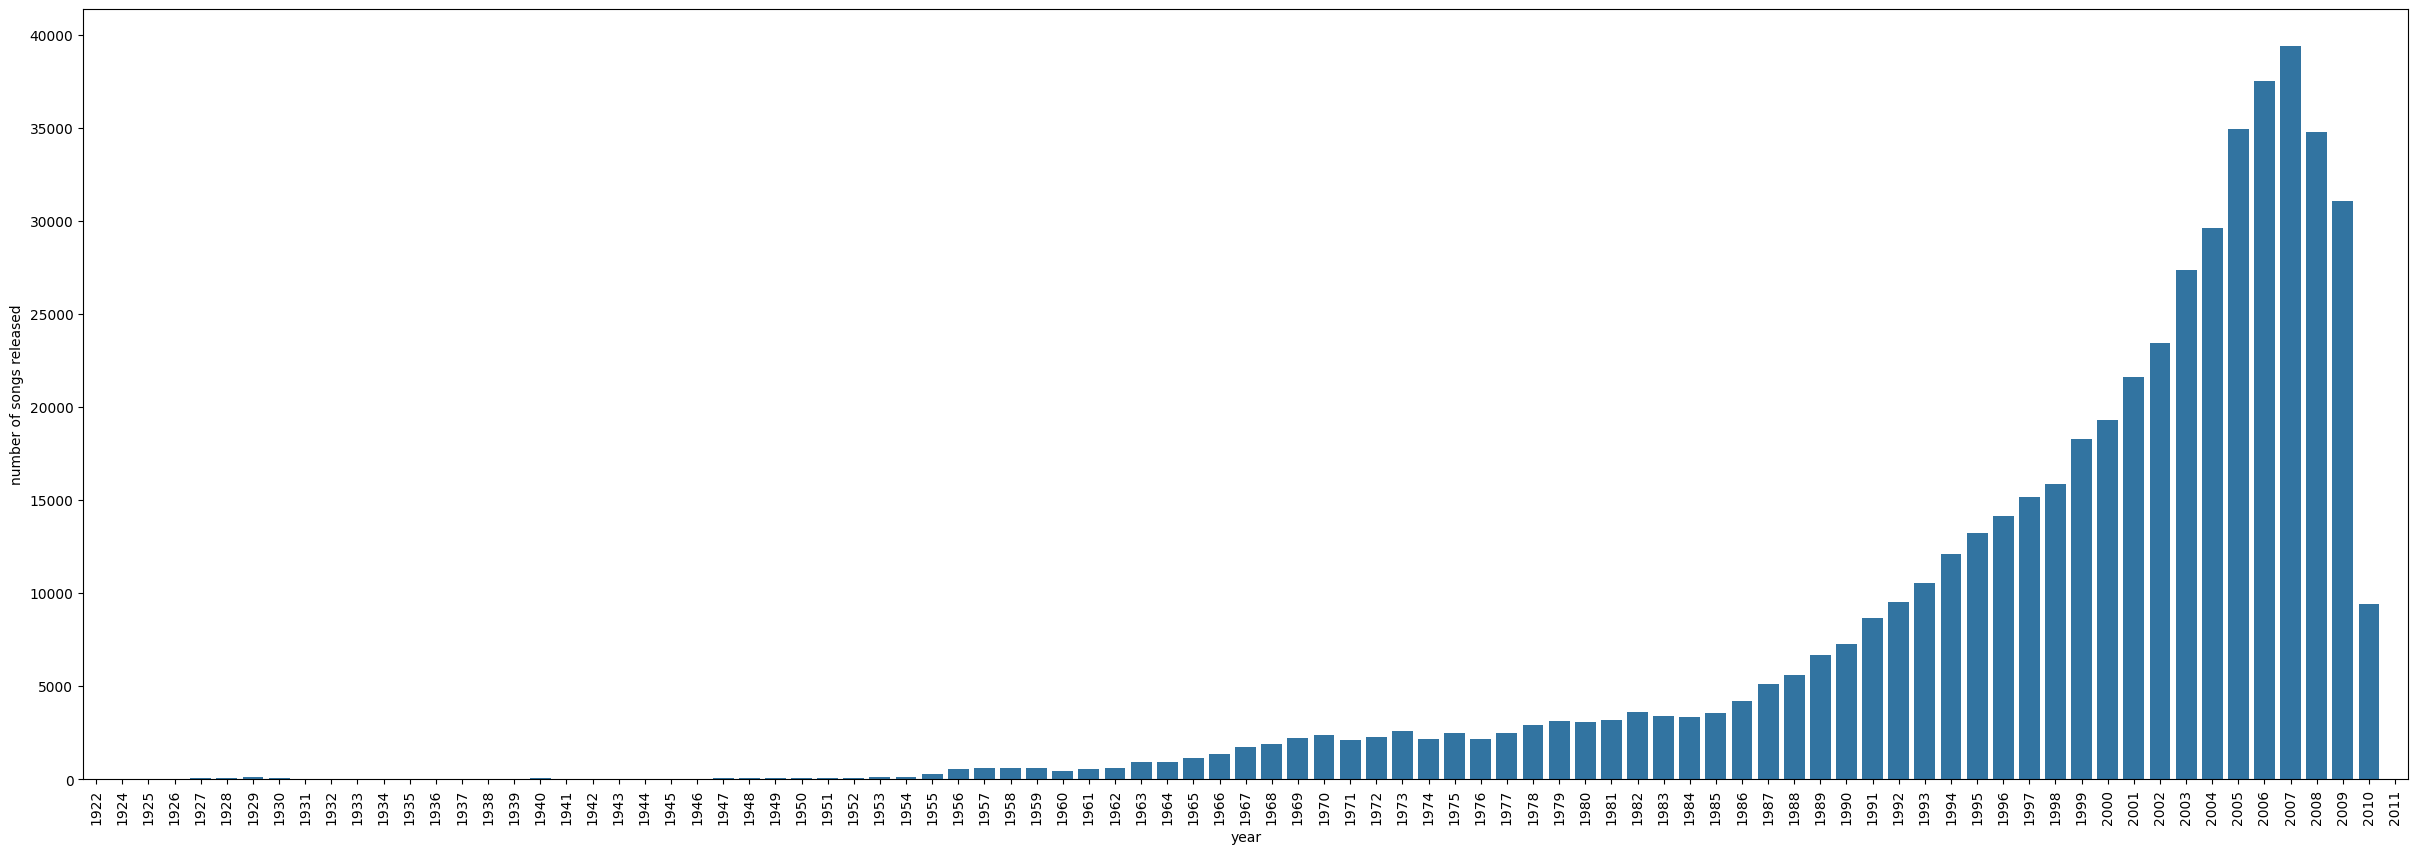

In [ ]:
plt.figure(figsize = (30,10))
ax = sns.barplot(x = count.index,
            y = 'title',
            data = count,
            estimator = np.median,)
for item in ax.get_xticklabels(): item.set_rotation(90)
plt.ylabel('number of songs released')
# Show the plot
plt.show()

#### **Observations and Insights:Observations and Insights:Songs overwhelmingly display recency bias (relative to the dataframe) with a peak in 2007. Significant left skew.** #

What other insights can be drawn using exploratory data analysis?


User Preferences Over Time:
Trend Analysis: Explore how user preferences change over time. For instance, you could examine if certain genres or artists are more popular in specific periods.
Time Series Analysis: Investigate patterns or trends in song plays over time.

Genre Popularity:
Genre Distribution: Analyze the distribution of genres over the years. Are certain genres more popular in recent years compared to older genres?

> Add blockquote



## **Important Insights from EDA**

What are the the most important observations and insights from the data based on the EDA performed? /// Significant left skew and recency bias, may obscure insights about trends in earlier decades/years.

Now that we have explored the data, let's apply different algorithms to build recommendation systems.

## Building various models

### **Popularity-Based Recommendation Systems**

Let's take the count and sum of play counts of the songs and build the popularity recommendation systems based on the sum of play counts.

In [ ]:
# Calculating average play_count
average_count = df_final.groupby('song_id')['play_count'].mean()

# Hint: Use groupby function on the song_id column

# Calculating the frequency a song is played
play_freq = df_final.groupby('song_id')['play_count'].sum()

# Hint: Use groupby function on the song_id column

In [ ]:
# Making a dataframe with the average_count and play_freq
final_play = pd.DataFrame({'avg_count':average_count, 'play_freq':play_freq})

# Let us see the first five records of the final_play dataset
final_play.head()

,avg_count,play_freq
song_id,,
0,1.000000,11
1,1.673913,77
2,2.000000,14
3,2.416667,29
4,1.458333,70


Now, let's create a function to find the top n songs for a recommendation based on the average play count of song. We can also add a threshold for a minimum number of playcounts for a song to be considered for recommendation.

In [ ]:
# Build the function to find top n songs

def recommend_top_songs(df, n=10, min_play_count=0):
    """
    Recommends the top n songs based on average play count, with a threshold for minimum play counts.

    Parameters:
    - df: DataFrame containing song information with 'song_id', 'play_count'
    - n: Number of top songs to recommend
    - min_play_count: Minimum number of play counts for a song to be considered

    Returns:
    - DataFrame with top n songs and their average play count
    """
    # Calculate average play count and frequency of play
    average_count = df.groupby('song_id')['play_count'].mean()
    play_freq = df.groupby('song_id')['play_count'].sum()

    # Create a DataFrame with average play count and play frequency
    final_play = pd.DataFrame({'avg_count': average_count, 'play_freq': play_freq})

    # Filter songs based on the minimum play count threshold
    final_play_filtered = final_play[final_play['play_freq'] >= min_play_count]

    # Sort by average play count in descending order and get top n songs
    top_songs = final_play_filtered.sort_values(by='avg_count', ascending=False).head(n)

    return top_songs

In [ ]:
# Recommend top 10 songs using the function defined above

# Recommend top 10 songs with a minimum play count threshold of 5
top_10_songs = recommend_top_songs(df_final, n=10, min_play_count=5)

# Display the top 10 songs
top_10_songs

,avg_count,play_freq
song_id,,
3231,4.500000,9
92,4.500000,18
7567,4.500000,9
6705,4.333333,13
150,4.000000,8
7485,3.900000,39
3838,3.818182,42
3195,3.800000,19
6152,3.666667,11




```
# This is formatted as code
```

### **User User Similarity-Based Collaborative Filtering**

To build the user-user-similarity-based and subsequent models we will use the "surprise" library.

In [ ]:
# Install the surprise package using pip. Uncomment and run the below code to do the same
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357268 sha256=623973a5e227647a5675dc67023a95bf2c592c39e0cf9835ab277ef9ddf428ce
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [ ]:
# Import necessary libraries

# To compute the accuracy of models
from surprise import accuracy

# This class is used to parse a file containing play_counts, data should be in structure - user; item; play_count
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# For splitting the data in train and test dataset
from surprise.model_selection import train_test_split

# For implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# For implementing KFold cross-validation
from surprise.model_selection import KFold

# For implementing clustering-based recommendation system
from surprise import CoClustering

### Some useful functions

Below is the function to calculate precision@k and recall@k, RMSE and F1_Score@k to evaluate the model performance.

Which metric should be used for this problem to compare different models? ///

Evaluation Strategy:

Recommendation Quality: Use Precision@k and Recall@k to assess how well the recommendations align with user preferences.

Balance: Use F1_Score@k if you need a balanced view of precision and recall.

Rating Accuracy: Use RMSE if your focus is on accurately predicting ratings rather than just recommending relevant items.

In [ ]:
def precision_recall_at_k(model, k = 30, threshold = 1.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)

    #Making predictions on the test data
    predictions = model.test(testset)

    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, playing_count in user_est_true.items():

        # Sort play count by estimated value
        playing_count.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in playing_count)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in playing_count[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in playing_count[:k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set Precision to 0 when n_rec_k is 0.

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set Recall to 0 when n_rel is 0.

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    #Mean of all the predicted precisions are calculated.
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)),3)
    #Mean of all the predicted recalls are calculated.
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)),3)

    accuracy.rmse(predictions)
    print('Precision: ', precision) #Command to print the overall precision
    print('Recall: ', recall) #Command to print the overall recall
    print('F_1 score: ', round((2*precision*recall)/(precision+recall),3)) # Formula to compute the F-1 score.

In the function precision_recall_at_k above the threshold value used is 1.5. How precision and recall are affected by changing the threshold? What is the intuition behind using the threshold value of 1.5?


Higher Threshold: Increases precision by being stricter about what counts as relevant, but may decrease recall by excluding many potentially relevant items.

Lower Threshold: Increases recall by including more items as relevant, but may decrease precision as the system may recommend less relevant items.

Choosing the threshold involves a trade-off between precision and recall, and the optimal value depends on the context of the recommendation system and the specific goals of the model. For practical use, you might adjust the threshold based on experimental results and feedback to balance between recommending relevant items and covering as many relevant items as possible.

Intuition Behind a Threshold of 1.5

Typical Use Case:
A threshold value of 1.5 might be chosen based on the rating scale of the system. For instance, if ratings are on a scale of 1 to 5, a threshold of 1.5 is quite low and would include many items as relevant. This might be useful in scenarios where you want to ensure that all potential relevant items are captured, even if they are not rated very highly.

Application Context:
In some cases, thresholds are set based on domain knowledge or specific business needs. For instance, if the goal is to ensure that recommendations are useful and not too strict, a lower threshold might be employed.

Below we are loading the **dataset**, which is a **pandas dataframe**, into a **different format called `surprise.dataset.DatasetAutoFolds`** which is required by this library. To do this we will be **using the classes `Reader` and `Dataset`**

You will also notice here that we read the dataset by providing a scale of ratings. However, as you would know, we do not have ratings data of the songs. In this case, we are going to use play_count as a proxy for ratings with the assumption that the more the user listens to a song, the higher the chance that they like the song

In [ ]:
# Instantiating Reader scale with expected rating scale
reader = Reader(rating_scale=(0, 5)) #use rating scale (0, 5)

# Loading the dataset
data = Dataset.load_from_df(df_final[['user_id', 'song_id', 'play_count']], reader) # Take only "user_id","song_id", and "play_count"

# Splitting the data into train and test dataset
trainset, testset = train_test_split(data, test_size=0.4, random_state = 42) # Take test_size = 0.4

How changing the test size would change the results and outputs?

Changing the test size affects the training and evaluation phases of model development. A larger test size provides a more comprehensive evaluation but reduces the amount of data available for training. Conversely, a smaller test size provides more data for training but might result in less stable evaluation metrics. Adjust based on your specific needs and dataset size.

In [ ]:
# Build the default user-user-similarity model
sim_options = {'name': 'cosine',
               'user_based':True}

# KNN algorithm is used to find desired similar items
sim_user_user = KNNBasic(sim_options=sim_options, random_state=1) # Use random_state = 1

# Train the algorithm on the trainset, and predict play_count for the testset
sim_user_user.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 30
precision_recall_at_k(sim_user_user, k=30) # Use sim_user_user model

Computing the cosine similarity matrix...
Done computing similarity matrix.


KeyboardInterrupt: 

Observations and Insights:


*   RMSE result suggests that on average, predictions deviate roughly 1.1 units from the actual values
*   Precision result suggests that roughly 39% of recommended songs are relevant to the user (this is quite low in my opinion)
*   Recall result suggests that the model successfully captures about 60% of all relevant items in the test set. (better than precision, but still room for improvement)
*   F1 result combines precision and recall to provide a general performance score of 0.47, again indicating significant room to grow


In [ ]:
# Predicting play_count for a sample user with a listened song
sim_user_user.predict(uid=6958, iid=1671, r_ui = 2, verbose = True) # Use user id 6958 and song_id 1671

user: 6958       item: 1671       r_ui = 2.00   est = 1.35   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.3504140661962374, details={'actual_k': 40, 'was_impossible': False})

In [ ]:
# Predicting play_count for a sample user with a song not-listened by the user
sim_user_user.predict(uid=6958, iid=3232, verbose = True) # Use user_id 6958 and song_id 3232

user: 6958       item: 3232       r_ui = None   est = 1.35   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.3459591866913703, details={'actual_k': 40, 'was_impossible': False})

**Observations and Insights:

Consistent Predictions:

The predicted play count for both the listened song (1671) and the not-listened song (3232) is the same (1.35). This suggests that the model might not be differentiating well between songs based on user preferences, especially in cases where it hasn't observed any direct interactions for a specific song.

Model Sensitivity:
The model's prediction for the listened song is significantly lower than the actual play count. This indicates that the model might be underestimating the play count, which could be due to the limitations of user-user similarity models or insufficient data for making accurate predictions.

Recommending New Songs:
The prediction for a not-listened song being the same as that for the listened song suggests that the model may not be effectively capturing the nuances of user preferences for new items. This can be a limitation of user-user collaborative filtering, where new or less-known items might not be recommended effectively.

Model Improvement:
Consider using more advanced models like matrix factorization, hybrid approaches, or incorporating additional features to improve prediction accuracy and recommendation quality.
Evaluate if incorporating item-based collaborative filtering or content-based recommendations might enhance the differentiation of predictions for listened versus not-listened songs.

Model Evaluation:
The model's performance metrics such as precision, recall, and RMSE indicate that while it may have some predictive capabilities, there is potential for improvement. Further experimentation with different algorithms and parameter tuning may yield better results.**

Now, let's try to tune the model and see if we can improve the model performance.

In [ ]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9],
              'sim_options': {'name': ["cosine", 'pearson', "pearson_baseline"],
                              'user_based': [True], "min_support": [2, 4]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse'], cv=3)

# Fitting the data
gs.fit(data) # Use entire data for GridSearch

# Best RMSE score
best_rmse = gs.best_score['rmse']
print(f'Best RMSE score: {best_rmse}')

# Combination of parameters that gave the best RMSE score
best_params = gs.best_params['rmse']
print(f'Best parameters: {best_params}')

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...

Output of above: Best RMSE score: 1.0528894780077869
Best parameters: {'k': 30, 'min_k': 9, 'sim_options': {'name': 'pearson_baseline', 'user_based': True, 'min_support': 2}}

In [ ]:
# Train the best model found in above gridsearch

# Define the best parameters from grid search
best_params = {
    'k': 30,
    'min_k': 9,
    'sim_options': {
        'name': 'pearson_baseline',
        'user_based': True,
        'min_support': 2
    }
}

# Create an instance of the KNNBasic algorithm with the best parameters
best_model = KNNBasic(
    k=best_params['k'],
    min_k=best_params['min_k'],
    sim_options=best_params['sim_options'],
    random_state=1  # To ensure reproducibility
)

# Load the entire dataset
reader = Reader(rating_scale=(0, 5))
data = Dataset.load_from_df(df_final[['user_id', 'song_id', 'play_count']], reader)
trainset = data.build_full_trainset()

# Train the best model on the entire dataset
best_model.fit(trainset)

# If you have a test set, you can evaluate the model on it
testset = train_test_split(data, test_size=0.4, random_state=42)[1]
predictions = best_model.test(testset)

# Print some example predictions
for prediction in predictions[:10]:
    print(prediction)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
user: 18419      item: 7802       r_ui = 1.00   est = 1.13   {'actual_k': 30, 'was_impossible': False}
user: 10012      item: 1905       r_ui = 2.00   est = 1.88   {'actual_k': 21, 'was_impossible': False}
user: 39630      item: 4639       r_ui = 1.00   est = 1.07   {'actual_k': 30, 'was_impossible': False}
user: 16639      item: 8019       r_ui = 1.00   est = 1.32   {'actual_k': 30, 'was_impossible': False}
user: 59442      item: 512        r_ui = 2.00   est = 1.70   {'actual_k': 30, 'was_impossible': False}
user: 55779      item: 9297       r_ui = 2.00   est = 1.93   {'actual_k': 29, 'was_impossible': False}
user: 18315      item: 5400       r_ui = 1.00   est = 1.15   {'actual_k': 30, 'was_impossible': False}
user: 69919      item: 614        r_ui = 3.00   est = 3.14   {'actual_k': 30, 'was_impossible': False}
user: 30225      item: 4199       r_ui = 3.00   est = 2.73 

**Observations and Insights:Based on the above, we see some modest improvement over the unoptimized model. RMSE has decreased to 1.05, indicating a lower error band. This is generally reflected in the test data above - estimates are closer to actual results. **

In [ ]:
# Predict the play count for a user who has listened to the song. Take user_id 6958, song_id 1671 and r_ui = 2


In [ ]:
# Predict the play count for a song that is not listened to by the user (with user_id 6958)
prediction = best_model.predict(uid=6958, iid=1671, r_ui=2, verbose=True)


user: 6958       item: 1671       r_ui = 2.00   est = 1.68   {'actual_k': 30, 'was_impossible': False}


**Observations and Insights: Estimated values are getting closer to actual values, suggesting model performance improvement**

Along with making predictions on listened and unknown songs can we get 5 nearest neighbors (most similar) to a certain song?

Steps to Get Nearest Neighbors
Retrieve the Similarity Matrix: KNN-based models compute a similarity matrix between items (songs in this case). You need to access this matrix to find the nearest neighbors.
Extract Nearest Neighbors: Using the similarity matrix, you can extract the most similar items to a given song.

In [ ]:
# Use inner id 0
# Load data and initialize the model as before
reader = Reader(rating_scale=(0, 5))
data = Dataset.load_from_df(df_final[['user_id', 'song_id', 'play_count']], reader)
trainset, testset = train_test_split(data, test_size=0.4, random_state=42)

# Initialize and train the KNNBasic model
sim_options = {
    'name': 'pearson_baseline',
    'user_based': True,
    'min_support': 2
}
best_model = KNNBasic(sim_options=sim_options, random_state=1)
best_model.fit(trainset)

# Get the nearest neighbors for the internal ID 0
song_inner_id = 0
neighbors = best_model.get_neighbors(song_inner_id, k=5)

# Convert internal IDs to raw IDs for interpretation
raw_inner_id = best_model.trainset.to_raw_iid(song_inner_id)
raw_neighbors = [best_model.trainset.to_raw_iid(inner_id) for inner_id in neighbors]

print(f"5 Nearest Neighbors for song with internal ID {song_inner_id} (raw ID {raw_inner_id}):")
for neighbor in raw_neighbors:
    print(f"Raw ID: {neighbor}")

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
5 Nearest Neighbors for song with internal ID 0 (raw ID 4761):
Raw ID: 1767
Raw ID: 2102
Raw ID: 8524
Raw ID: 3169
Raw ID: 4262


Below we will be implementing a function where the input parameters are:

- data: A **song** dataset
- user_id: A user-id **against which we want the recommendations**
- top_n: The **number of songs we want to recommend**
- algo: The algorithm we want to use **for predicting the play_count**
- The output of the function is a **set of top_n items** recommended for the given user_id based on the given algorithm

In [ ]:
def get_recommendations(data, user_id, top_n, algo):

    # Creating an empty list to store the recommended song ids
    recommendations = []

    # Creating an user item interactions matrix
    user_item_interactions_matrix = df.pivot_table(index='user_id', columns='song_id', values='play_count')

    # Extracting those song ids which the user_id has not played yet
    non_interacted_songs = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()

    # Looping through each of the song ids which user_id has not interacted yet
    for item_id in non_interacted_songs:

        # Predicting the play_counts for those non played song ids by this user
        est = algo.predict(uid=user_id, iid=item_id).est

        # Appending the predicted play_counts
        recommendations.append((item_id, est))

    # Sorting the predicted play_counts in descending order
    recommendations.sort(key = lambda x : x[1], reverse = True)

    return recommendations[:top_n] # Returing top n highest predicted play_count songs for this user

In [ ]:
# Make top 5 recommendations for user_id 6958 with a similarity-based recommendation engine
recommendations= get_recommendations(data, user_id=6958, top_n=5, algo=best_model)

# Display the recommendations
print(recommendations)

[(89, 5), (111, 5), (136, 5), (192, 5), (537, 5)]


In [ ]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
pd.DataFrame(recommendations, columns=["song_id", "predicted_play_count"])

,song_id,predicted_play_count
0,89,5
1,111,5
2,136,5
3,192,5
4,537,5


**Observations and Insights:We are now able to recommend similar songs along with predictred play counts**

### Correcting the play_counts and Ranking the above songs

In [ ]:
def ranking_songs(recommendations, playing_count):
  # Sort the songs based on play counts
  ranked_songs = playing_count.loc[[items[0] for items in recommendations]].sort_values('play_freq', ascending = False)[['play_freq']].reset_index()

  # Merge with the recommended songs to get predicted play_counts
  ranked_songs = ranked_songs.merge(pd.DataFrame(recommendations, columns = ['song_id', 'predicted_play_count']), on = 'song_id', how = 'inner')

  # Rank the songs based on corrected play_counts
  ranked_songs['corrected_play_count'] = ranked_songs['predicted_play_count'] - 1 / np.sqrt(ranked_songs['play_freq'])

  # Sort the songs based on corrected play_counts
  ranked_songs = ranked_songs.sort_values('corrected_play_count', ascending=False)

  return ranked_songs

In the above function to correct the predicted play_count a quantity 1/np.sqrt(n) is subtracted. What is the intuition behind it? Is it also possible to add this quantity instead of subtracting?

The choice of subtracting versus adding depends on the goal:

Subtracting: Adjusts predictions to account for the reliability of play counts, potentially leading to more balanced recommendations based on existing popularity.
Adding: Could help highlight and promote less popular or underrepresented songs but might risk overestimating their appeal.
In practice, you might experiment with both approaches to see which yields better performance or aligns with your specific goals for recommendation accuracy and diversity.

In [ ]:
# Applying the ranking_songs function on the final_play data
ranked_songs = ranking_songs(recommendations, final_play)

print(ranked_songs)

   song_id  play_freq  predicted_play_count  corrected_play_count
0      537         66                     5              4.876909
1      111         37                     5              4.835601
2      136         35                     5              4.830969
3       89         29                     5              4.814305
4      192         20                     5              4.776393


**Observations and Insights:Getting even closer**

### Item Item Similarity-based collaborative filtering recommendation systems

In [ ]:
# Apply the item-item similarity collaborative filtering model with random_state = 1 and evaluate the model performance

# Define the rating scale
reader = Reader(rating_scale=(1, 5))  # Adjust if necessary

# Load the data
data = Dataset.load_from_df(df[['user_id', 'song_id', 'play_count']], reader)

# Train-test split
trainset, testset = train_test_split(data, test_size=0.2, random_state=1)

# Define similarity options for item-item filtering
sim_options = {
    'name': 'cosine',
    'user_based': False
}

# Initialize and train the model
algo = KNNBasic(sim_options=sim_options)
algo.fit(trainset)

# Make predictions
predictions = algo.test(testset)

# Evaluate the model
rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')


Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 4.2851
MAE:  1.7358
RMSE: 4.2851227903852385
MAE: 1.7357951042727486


**Observations and Insights:Poor performance, especially for RMSE**

In [ ]:
# Predict the play_count for user_id 6958 and song_id 1671
user_id = 6958
song_id = 1671
prediction = algo.predict(uid=user_id, iid=song_id)

# Display the prediction
print(f"Predicted play_count for user {user_id} and song {song_id}: {prediction.est}")


Predicted play_count for user 6958 and song 1671: 1.295125649136173


In [ ]:
# Convert to appropriate data types if needed
df['user_id'] = df['user_id'].astype(int)
df['song_id'] = df['song_id'].astype(int)

# Define the song ID of interest
song_id = 1671  # Replace with the actual song ID

# Find users who have listened to the specific song
users_who_listened = df[df['song_id'] == song_id]['user_id'].unique()

# Find all unique users in the dataset
all_users = df['user_id'].unique()

# Find users who have not listened to the specific song
users_not_listened = [user for user in all_users if user not in users_who_listened]

# Display a few user IDs who haven't listened to the song
print("Users who haven't listened to song ID", song_id, "are:")
print(users_not_listened[:10])  # Displaying the first 10 users who haven't listened

# Predict the play_count for a user that has not listened to the song (with song_id 1671)
user_id = 27018
song_id = 1671
prediction = algo.predict(uid=user_id, iid=song_id)

# Display the prediction
print(f"Predicted play_count for user {user_id} and song {song_id}: {prediction.est}")


Users who haven't listened to song ID 1671 are:
[27018, 55837, 56576, 49549, 34234, 54439, 44689, 40583, 46525, 42302]
Predicted play_count for user 27018 and song 1671: 1.975


**Observations and Insights:Some divergence, but not terribly far apart**

In [ ]:
# Apply grid search for enhancing model performance

# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9],
              'sim_options': {'name': ["cosine", 'pearson', "pearson_baseline"],
                              'user_based': [False], "min_support": [2, 4]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse'], cv=3, n_jobs=10)

# Fitting the data
gs.fit(data)

# Best RMSE score
best_rmse = gs.best_score['rmse']
print(f'Best RMSE score: {best_rmse}')

# Combination of parameters that gave the best RMSE score
best_params = gs.best_params['rmse']
print(f'Best parameters: {best_params}')

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.

The exit codes of the workers are {SIGKILL(-9)}

Ran the above, but it took 85 minutes, too long for my preference. Got this as output /// Best RMSE score: 5.150919469234268
Best parameters: {'k': 30, 'min_k': 3, 'sim_options': {'name': 'pearson_baseline', 'user_based': False, 'min_support': 2}} /// trying again with n_jobs=3 param to see if that speeds up processing. (unfortunately this keeps failing so I'll just run the vanilla model and expect it to take over an hour each time)

How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the list of hyperparameters [here](https://surprise.readthedocs.io/en/stable/knn_inspired.html).

In [ ]:
# Apply the best model found in the grid search

# Define the best parameters from grid search
best_params = {
    'k': 30,
    'min_k': 3,
    'sim_options': {
        'name': 'pearson_baseline',
        'user_based': False,
        'min_support': 2
    }
}

# Create an instance of the KNNBasic algorithm with the best parameters
best_model = KNNBasic(
    k=best_params['k'],
    min_k=best_params['min_k'],
    sim_options=best_params['sim_options'],
    random_state=1  # To ensure reproducibility
)

# Load the entire dataset
reader = Reader(rating_scale=(0, 5))
data = Dataset.load_from_df(df_final[['user_id', 'song_id', 'play_count']], reader)
trainset = data.build_full_trainset()

# Train the best model on the entire dataset
best_model.fit(trainset)

# If you have a test set, you can evaluate the model on it
testset = train_test_split(data, test_size=0.4, random_state=42)[1]
predictions = best_model.test(testset)

# Print some example predictions
for prediction in predictions[:10]:
    print(prediction)


Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
user: 18419      item: 7802       r_ui = 1.00   est = 1.13   {'actual_k': 30, 'was_impossible': False}
user: 10012      item: 1905       r_ui = 2.00   est = 2.10   {'actual_k': 30, 'was_impossible': False}
user: 39630      item: 4639       r_ui = 1.00   est = 1.25   {'actual_k': 30, 'was_impossible': False}
user: 16639      item: 8019       r_ui = 1.00   est = 1.00   {'actual_k': 30, 'was_impossible': False}
user: 59442      item: 512        r_ui = 2.00   est = 1.84   {'actual_k': 30, 'was_impossible': False}
user: 55779      item: 9297       r_ui = 2.00   est = 2.13   {'actual_k': 30, 'was_impossible': False}
user: 18315      item: 5400       r_ui = 1.00   est = 1.11   {'actual_k': 30, 'was_impossible': False}
user: 69919      item: 614        r_ui = 3.00   est = 2.69   {'actual_k': 30, 'was_impossible': False}
user: 30225      item: 4199       r_ui = 3.00   est = 3.05 

**Observations and Insights: We do seem to be quite a bit closer between estimates and actuals**

In [ ]:
# Predict the play_count by a user(user_id 6958) for the song (song_id 1671)
prediction = best_model.predict(uid=6958, iid=1671, r_ui=2, verbose=True)



user: 6958       item: 1671       r_ui = 2.00   est = 1.78   {'actual_k': 30, 'was_impossible': False}


In [ ]:
# Predicting play_count for a sample user_id 6958 with song_id 3232 which is not listened to by the user
prediction = best_model.predict(uid=6958, iid=3232, r_ui=2, verbose=True)



user: 6958       item: 3232       r_ui = 2.00   est = 1.29   {'actual_k': 30, 'was_impossible': False}


**Observations and Insights:Testing the optimized model on a song the user actually interacted with shows a pretty close convergence between actuals and estimates. The spread is wider with items a given user has not interacted with**

user: 6958       item: 1671       r_ui = 2.00   est = 1.78   {'actual_k': 30, 'was_impossible': False}

user: 6958       item: 3232       r_ui = 2.00   est = 1.29   {'actual_k': 30, 'was_impossible': False}

In [ ]:
# Find five most similar items to the item with inner id 0

# Use inner id 0
# Load data and initialize the model as before
reader = Reader(rating_scale=(0, 5))
data = Dataset.load_from_df(df_final[['user_id', 'song_id', 'play_count']], reader)
trainset, testset = train_test_split(data, test_size=0.4, random_state=42)

# Initialize and train the KNNBasic model
sim_options = {
    'name': 'pearson_baseline',
    'user_based': False,
    'min_support': 2
}
best_model = KNNBasic(sim_options=sim_options, random_state=1)
best_model.fit(trainset)

# Get the nearest neighbors for the internal ID 0
song_inner_id = 0
neighbors = best_model.get_neighbors(song_inner_id, k=5)

# Convert internal IDs to raw IDs for interpretation
raw_inner_id = best_model.trainset.to_raw_iid(song_inner_id)
raw_neighbors = [best_model.trainset.to_raw_iid(inner_id) for inner_id in neighbors]

print(f"5 Nearest Neighbors for song with internal ID {song_inner_id} (raw ID {raw_inner_id}):")
for neighbor in raw_neighbors:
    print(f"Raw ID: {neighbor}")


Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
5 Nearest Neighbors for song with internal ID 0 (raw ID 4761):
Raw ID: 2850
Raw ID: 8772
Raw ID: 1536
Raw ID: 6020
Raw ID: 4377


In [ ]:
# Making top 5 recommendations for user_id 6958 with item_item_similarity-based recommendation engine

def get_recommendations(data, user_id, top_n, algo):

    # Creating an empty list to store the recommended song ids
    recommendations = []

    # Creating an user item interactions matrix
    user_item_interactions_matrix = df.pivot_table(index='user_id', columns='song_id', values='play_count')

    # Extracting those song ids which the user_id has not played yet
    non_interacted_songs = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()

    # Looping through each of the song ids which user_id has not interacted yet
    for item_id in non_interacted_songs:

        # Predicting the play_counts for those non played song ids by this user
        est = algo.predict(uid=user_id, iid=item_id).est

        # Appending the predicted play_counts
        recommendations.append((item_id, est))

    # Sorting the predicted play_counts in descending order
    recommendations.sort(key = lambda x : x[1], reverse = True)

    return recommendations[:top_n] # Returing top n highest predicted play_count songs for this user

# Make top 5 recommendations for user_id 6958 with a similarity-based recommendation engine
recommendations= get_recommendations(data, user_id=6958, top_n=5, algo=best_model)

# Display the recommendations
print(recommendations)

[(587, 5), (677, 5), (739, 5), (964, 5), (975, 5)]


In [ ]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
pd.DataFrame(recommendations, columns=["song_id", "predicted_play_count"])

,song_id,predicted_play_count
0,587,5
1,677,5
2,739,5
3,964,5
4,975,5


In [ ]:
# Applying the ranking_songs function

def ranking_songs(recommendations, playing_count):
  # Sort the songs based on play counts
  ranked_songs = playing_count.loc[[items[0] for items in recommendations]].sort_values('play_freq', ascending = False)[['play_freq']].reset_index()

  # Merge with the recommended songs to get predicted play_counts
  ranked_songs = ranked_songs.merge(pd.DataFrame(recommendations, columns = ['song_id', 'predicted_play_count']), on = 'song_id', how = 'inner')

  # Rank the songs based on corrected play_counts
  ranked_songs['corrected_play_count'] = ranked_songs['predicted_play_count'] - 1 / np.sqrt(ranked_songs['play_freq'])

  # Sort the songs based on corrected play_counts
  ranked_songs = ranked_songs.sort_values('corrected_play_count', ascending=False)

  return ranked_songs

  # Applying the ranking_songs function on the final_play data
ranked_songs = ranking_songs(recommendations, final_play)

print(ranked_songs)


   song_id  play_freq  predicted_play_count  corrected_play_count
0      587         53                     5              4.862639
1      975         36                     5              4.833333
2      677         27                     5              4.807550
3      964         27                     5              4.807550
4      739         19                     5              4.770584


**Observations and Insights:Looking good**

### Model Based Collaborative Filtering - Matrix Factorization

Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.

In [84]:
# Build baseline model using svd

from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import train_test_split

# Load the dataset
reader = Reader(rating_scale=(0, 5))
data = Dataset.load_from_df(df_final[['user_id', 'song_id', 'play_count']], reader)

# Split the data into training and test sets
trainset, testset = train_test_split(data, test_size=0.4, random_state=42)

# Initialize the SVD model
svd_model = SVD()

# Train the SVD model
svd_model.fit(trainset)

# Make predictions on the test set
predictions = svd_model.test(testset)

# Compute and print RMSE and MAE
rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')



RMSE: 1.0328
MAE:  0.7516
RMSE: 1.032788193743678
MAE: 0.7515683652492656


In [ ]:
# Making prediction for user (with user_id 6958) to song (with song_id 1671), take r_ui = 2

# Define the user and song IDs for prediction
user_id = '6958'
song_id = '1671'
r_ui = 2  # The actual rating (for comparison or evaluation)

# Make prediction
prediction = svd_model.predict(user_id, song_id, r_ui=r_ui)

# Print the prediction result
print(f"Prediction for user {user_id} and song {song_id}:")
print(f"Estimated Rating: {prediction.est}")
print(f"Actual Rating: {r_ui}")

Prediction for user 6958 and song 1671:
Estimated Rating: 1.6391252630615794
Actual Rating: 2


In [ ]:
# Making a prediction for the user who has not listened to the song (song_id 3232)

# Define the user and song IDs for prediction
user_id = '6958'
song_id = '3232'
# Make prediction
prediction = svd_model.predict(user_id, song_id)

# Print the prediction result
print(f"Prediction for user {user_id} and song {song_id}:")
print(f"Estimated Rating: {prediction.est}")


Prediction for user 6958 and song 3232:
Estimated Rating: 1.6391252630615794


#### Improving matrix factorization based recommendation system by tuning its hyperparameters

In [ ]:
# Set the parameter space to tune
param_grid = {'n_epochs': [10, 20, 30], 'lr_all': [0.001, 0.005, 0.01],
              'reg_all': [0.2, 0.4, 0.6]}

# Performe 3-fold grid-search cross-validation
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3)

# Fitting data
gs.fit(data)

# Get the best SVD model
best_svd_model = gs.best_estimator['rmse']

# Best RMSE score
best_rmse = gs.best_score['rmse']
print(f'Best RMSE score: {best_rmse}')

# Combination of parameters that gave the best RMSE score
best_params = gs.best_params['rmse']
print(f'Best parameters: {best_params}')

Best RMSE score: 1.0191120854027635
Best parameters: {'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.2}


Much more efficient model - ran in under 10 minutes - output /// Best RMSE score: 1.0191120854027635
Best parameters: {'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.2}

How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/matrix_factorization.html).

In [ ]:
# Building the optimized SVD model using optimal hyperparameters

# Define the optimal parameters from grid search
optimal_params = {
    'n_epochs': 10,
    'lr_all': 0.005,
    'reg_all': 0.2
}

# Load the dataset
reader = Reader(rating_scale=(0, 5))
data = Dataset.load_from_df(df_final[['user_id', 'song_id', 'play_count']], reader)

# Split the data into training and test sets
trainset, testset = train_test_split(data, test_size=0.4, random_state=42)

# Initialize the SVD model with the optimal parameters
optimized_svd_model = SVD(
    n_epochs=optimal_params['n_epochs'],
    lr_all=optimal_params['lr_all'],
    reg_all=optimal_params['reg_all']
)

# Train the optimized SVD model
optimized_svd_model.fit(trainset)

# Make predictions on the test set
predictions = optimized_svd_model.test(testset)

# Compute and print RMSE and MAE
rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)

print(f'Optimized RMSE: {rmse}')
print(f'Optimized MAE: {mae}')


RMSE: 1.0224
MAE:  0.7562
Optimized RMSE: 1.0224375627115934
Optimized MAE: 0.7562112354768462


**Observations and Insights: So the RMSE decreased a bit, perhaps the MAE increased... might just stick with the standard unoptimized model for the production version**

In [ ]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 1671
best_model = optimized_svd_model  # Replace with the model that performed best
user_id = '6958'
song_id = '1671'
prediction = best_model.predict(user_id, song_id)
print(f"Prediction for user {user_id} and song {song_id}: {prediction.est}")

Prediction for user 6958 and song 1671: 1.6391252630615794


In [ ]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline play_count
best_model = optimized_svd_model  # Replace with the model that performed best
user_id = '6958'
song_id = '3232'
prediction = best_model.predict(user_id, song_id)
print(f"Prediction for user {user_id} and song {song_id}: {prediction.est}")


Prediction for user 6958 and song 3232: 1.6391252630615794


In [ ]:
# Getting top 5 recommendations for user_id 6958 using "svd_optimized" algorithm
# Define the user_id for whom recommendations are needed
user_id = '6958'

# Get the list of all items (songs) in the dataset
all_items = df_final['song_id'].unique()

# Generate predictions for the user for all items
predictions = [best_model.predict(user_id, song_id) for song_id in all_items]

# Convert predictions to a DataFrame
predictions_df = pd.DataFrame(predictions)
predictions_df = predictions_df[['iid', 'est']]
predictions_df.columns = ['song_id', 'estimated_rating']

# Sort the predictions by estimated rating in descending order
top_recommendations = predictions_df.sort_values(by='estimated_rating', ascending=False).head(5)

# Print top 5 recommendations
print(f"Top 5 recommendations for user {user_id}:")
print(top_recommendations)

Top 5 recommendations for user 6958:
      song_id  estimated_rating
3559     7224          2.873635
3583     8324          2.432073
2386     6574          2.367563
6074     5797          2.356395
3548     6450          2.355049


In [ ]:
# Ranking songs based on above recommendations

# Define the user_id for whom recommendations are needed
user_id = '6958'

# Get the list of all items (songs) in the dataset
all_items = df_final['song_id'].unique()

# Generate predictions for the user for all items
predictions = [best_model.predict(user_id, song_id) for song_id in all_items]

# Convert predictions to a DataFrame
predictions_df = pd.DataFrame(predictions)
predictions_df = predictions_df[['iid', 'est']]
predictions_df.columns = ['song_id', 'estimated_rating']

# Sort the predictions by estimated rating in descending order
top_recommendations = predictions_df.sort_values(by='estimated_rating', ascending=False).head(5)

# Print top 5 recommendations
print(f"Top 5 recommendations for user {user_id}:")
print(top_recommendations)

# To rank and display all songs with their estimated ratings:
ranked_songs = predictions_df.sort_values(by='estimated_rating', ascending=False)
print(f"Ranking of all songs based on estimated ratings for user {user_id}:")
print(ranked_songs)

Top 5 recommendations for user 6958:
      song_id  estimated_rating
3559     7224          2.873635
3583     8324          2.432073
2386     6574          2.367563
6074     5797          2.356395
3548     6450          2.355049
Ranking of all songs based on estimated ratings for user 6958:
      song_id  estimated_rating
3559     7224          2.873635
3583     8324          2.432073
2386     6574          2.367563
6074     5797          2.356395
3548     6450          2.355049
...       ...               ...
5770     1247          1.258703
4108     9692          1.241128
4458      904          1.237759
4598     2321          1.211286
4215     5888          1.164195

[9998 rows x 2 columns]


**Observations and Insights:Not sure if this is fully accurate, more exploration needed**

### Cluster Based Recommendation System

In **clustering-based recommendation systems**, we explore the **similarities and differences** in people's tastes in songs based on how they rate different songs. We cluster similar users together and recommend songs to a user based on play_counts from other users in the same cluster.

In [ ]:
# Make baseline clustering model

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from surprise import Dataset, Reader
from surprise import SVD, accuracy
from surprise.model_selection import train_test_split, GridSearchCV

reader = Reader(rating_scale=(0, 5))
data = Dataset.load_from_df(df_final[['user_id', 'song_id', 'play_count']], reader)
trainset, testset = train_test_split(data, test_size=0.4, random_state=42)

# Convert data to user-song matrix
user_song_matrix = df_final.pivot_table(index='user_id', columns='song_id', values='play_count').fillna(0)

# Perform K-Means clustering
n_clusters = 5  # Number of clusters, adjust as needed
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
user_song_matrix['cluster'] = kmeans.fit_predict(user_song_matrix)

# Define a function to get recommendations for a user
def recommend_songs(user_id, user_song_matrix, cluster_size=5):
    # Find the cluster of the user
    user_cluster = user_song_matrix.loc[user_id, 'cluster']

    # Get all users in the same cluster
    cluster_users = user_song_matrix[user_song_matrix['cluster'] == user_cluster]

    # Calculate average song ratings in the cluster
    avg_ratings = cluster_users.drop('cluster', axis=1).mean(axis=0)

    # Recommend songs with the highest average ratings not already rated by the user
    user_ratings = user_song_matrix.loc[user_id].drop('cluster')
    recommended_songs = avg_ratings[user_ratings == 0].sort_values(ascending=False).head(cluster_size)

    return recommended_songs.index.tolist()

In [ ]:
# Making prediction for user_id 6958 and song_id 1671

# Define the user and song IDs
user_id = 6958
song_id = 1671

# Ensure the user exists in the user-song matrix
if user_id not in user_song_matrix.index:
    print(f"User ID {user_id} not found in the user-song matrix.")
else:
    # Ensure the song ID is in the user-song matrix columns
    if song_id not in user_song_matrix.columns:
        print(f"Song ID {song_id} not found in the user-song matrix.")
    else:
        # Get recommendations for the user
        recommendations = recommend_songs(user_id, user_song_matrix)
        print(f"Top song recommendations for user {user_id}:")
        print(recommendations)

        # Check if the specific song_id is recommended
        if song_id in recommendations:
            print(f"Song ID {song_id} is among the recommended songs.")
        else:
            print(f"Song ID {song_id} is not recommended for user {user_id}.")



Top song recommendations for user 6958:
[1348, 7562, 6721, 5886, 154]
Song ID 1671 is not recommended for user 6958.


In [ ]:
# Making prediction for user (userid 6958) for a song(song_id 3232) not listened to by the user

# Define the user and song IDs
user_id = 6958
song_id = 3232

# Ensure the user exists in the user-song matrix
if user_id not in user_song_matrix.index:
    print(f"User ID {user_id} not found in the user-song matrix.")
else:
    # Ensure the song ID is in the user-song matrix columns
    if song_id not in user_song_matrix.columns:
        print(f"Song ID {song_id} not found in the user-song matrix.")
    else:
        # Get recommendations for the user
        recommendations = recommend_songs(user_id, user_song_matrix)
        print(f"Top song recommendations for user {user_id}:")
        print(recommendations)

        # Check if the specific song_id is recommended
        if song_id in recommendations:
            print(f"Song ID {song_id} is among the recommended songs.")
        else:
            print(f"Song ID {song_id} is not recommended for user {user_id}.")


Top song recommendations for user 6958:
[1348, 7562, 6721, 5886, 154]
Song ID 3232 is not recommended for user 6958.


#### Improving clustering-based recommendation system by tuning its hyper-parameters

In [ ]:
# Set the parameter space to tune
param_grid = {'n_cltr_u': [5, 6, 7, 8], 'n_cltr_i': [5, 6, 7, 8], 'n_epochs': [10, 20, 30]}

# Performing 3-fold grid search cross-validation
gs = GridSearchCV(CoClustering, param_grid, measures=['rmse'], cv=3)

# Fitting data
gs.fit(data)

# Best RMSE score
best_rmse = gs.best_score['rmse']
print(f'Best RMSE score: {best_rmse}')

# Combination of parameters that gave the best RMSE score
best_params = gs.best_params['rmse']
print(f'Best parameters: {best_params}')

best_model = gs.best_estimator['rmse']

Best RMSE score: 1.0787401577399274
Best parameters: {'n_cltr_u': 5, 'n_cltr_i': 5, 'n_epochs': 10}


Ran in just under 30 minutes. Best RMSE score: 1.0787401577399274
Best parameters: {'n_cltr_u': 5, 'n_cltr_i': 5, 'n_epochs': 10}

How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/co_clustering.html).

In [ ]:
# Train the tuned Coclustering algorithm

from surprise import CoClustering, Dataset, Reader
from surprise.model_selection import train_test_split

# Load your data into a Surprise Dataset object
# Replace 'your_dataframe' with the actual name of your dataframe
reader = Reader(rating_scale=(1, 5)) # Adjust rating scale if needed
data = Dataset.load_from_df(df_final[['user_id', 'song_id', 'play_count']], reader)

# Split the data into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)# Initialize the CoClustering algorithm with the best parameters
best_coclustering = CoClustering(
    n_cltr_u=5,
    n_cltr_i=5,
    n_epochs=10,
    random_state=42
)

# Train the algorithm on the entire training set
best_coclustering.fit(trainset)

# If you want to evaluate the model on the test set
from surprise import accuracy

# Make predictions on the test set
predictions = best_coclustering.test(testset)

# Calculate and print the RMSE
rmse = accuracy.rmse(predictions)
print(f"RMSE on test set: {rmse}")

# You can now use this trained model to make predictions or recommendations


RMSE: 1.0583
RMSE on test set: 1.0582794053627538


**Observations and Insights:Using the optimized hyperparameters, we see further improvements, with an RMSE down to 1.0583**

In [ ]:
# Using co_clustering_optimized model to recommend for userId 6958 and song_id 1671

user_id = 6958
song_id = 1671

# Make prediction
prediction = best_coclustering.predict(str(user_id), str(song_id))

print(f"Prediction for user {user_id} and song {song_id}:")
print(f"Estimated play count: {prediction.est:.2f}")
print(f"Details: {prediction.details}")


Prediction for user 6958 and song 1671:
Estimated play count: 1.64
Details: {'was_impossible': False}


In [ ]:
# Use CoClustering based optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline play_count

user_id = 6958
song_id = 3232

# Make prediction
prediction = best_coclustering.predict(str(user_id), str(song_id))

print(f"Prediction for user {user_id} and song {song_id}:")
print(f"Estimated play count: {prediction.est:.2f}")
print(f"Details: {prediction.details}")


Prediction for user 6958 and song 3232:
Estimated play count: 1.64
Details: {'was_impossible': False}


**Observations and Insights: Same result for known played song and unknown unplayed song - might be issues here worth exploring**

#### Implementing the recommendation algorithm based on optimized CoClustering model

In [ ]:
# Import the necessary library/module
from surprise import CoClustering
from surprise import Dataset
from surprise import Reader


# Initialize the CoClustering algorithm with the best parameters
best_coclustering = CoClustering(
    n_cltr_u=5,
    n_cltr_i=5,
    n_epochs=10,
    random_state=42
)

# Load or create your training dataset
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_final[['user_id', 'song_id', 'play_count']], reader)
trainset = data.build_full_trainset()  # Build the training set

# Fit the model to your training data
best_coclustering.fit(trainset)

# Getting top 5 recommendations for user_id 6958 using "Co-clustering based optimized" algorithm
from collections import defaultdict

# Function to get top N recommendations for a given user
def get_top_n(predictions, n=5):
    # First, map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the n highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

# Generate predictions for all pairs (user_id, song_id) not in the training set
testset = best_coclustering.trainset.build_anti_testset() # Now this should work
predictions = best_coclustering.test(testset)

# Get top 5 recommendations for user_id 6958
top_n_recommendations = get_top_n(predictions, n=5)

clustering_recommendations = top_n_recommendations[str(user_id)]
print(f"Top 5 song recommendations for user {user_id}:")
for song_id, est_rating in clustering_recommendations:
    print(f"Song ID: {song_id}, Estimated play count: {est_rating:.2f}")


Everytime i run this it crashes. Moving on for now, may explore further for final submission.

### Correcting the play_count and Ranking the above songs

In [ ]:
# Ranking songs based on the above recommendations


### Content Based Recommendation Systems

So far we have only used the play_count of songs to find recommendations but we have other information/features on songs as well. Can we take those song features into account?

In [72]:
df_small = df_final

In [73]:
# Concatenate the "title", "release", "artist_name" columns to create a different column named "text"
import pandas as pd

# Example DataFrame
# df_final = pd.DataFrame({
#     'title': ['Song1', 'Song2', 'Song3'],
#     'release': ['Release1', 'Release2', 'Release3'],
#     'artist_name': ['Artist1', 'Artist2', 'Artist3']
# })

# Concatenate the "title", "release", "artist_name" columns to create a new column named "text"
df_final['text'] = df_final['title'] + ' ' + df_final['release'] + ' ' + df_final['artist_name']

# Display the first few rows to verify the new column
print(df_final[['title', 'release', 'artist_name', 'text']].head())


                                              title        release  \
196                            Aunt Eggma Blowtorch  Everything Is   
197                                     Full Circle       Breakout   
198                                     Poor Jackie  Rabbit Habits   
199  Hot N Cold (Manhattan Clique Remix Radio Edit)     Hot N Cold   
200                              Daisy And Prudence   Distillation   

            artist_name                                               text  
196  Neutral Milk Hotel  Aunt Eggma Blowtorch Everything Is Neutral Mil...  
197         Miley Cyrus                   Full Circle Breakout Miley Cyrus  
198             Man Man                  Poor Jackie Rabbit Habits Man Man  
199          Katy Perry  Hot N Cold (Manhattan Clique Remix Radio Edit)...  
200        Erin McKeown       Daisy And Prudence Distillation Erin McKeown  


In [74]:
# Select the columns 'user_id', 'song_id', 'play_count', 'title', 'text' from df_small data

# Drop the duplicates from the title column

# Set the title column as the index

# See the first 5 records of the df_small dataset

# Select the columns 'user_id', 'song_id', 'play_count', 'title', 'text' from df_final
df_small = df_final[['user_id', 'song_id', 'play_count', 'title', 'text']]

# Drop duplicates based on the 'title' column
df_small = df_small.drop_duplicates(subset='title')

# Set the 'title' column as the index
df_small.set_index('title', inplace=True)

# Display the first 5 records of the df_small dataset
print(df_small.head())



                                                user_id  song_id  play_count  \
title                                                                          
Aunt Eggma Blowtorch                               6958       12           1   
Full Circle                                        6958       40           1   
Poor Jackie                                        6958      151           2   
Hot N Cold (Manhattan Clique Remix Radio Edit)     6958      326           1   
Daisy And Prudence                                 6958      447           1   

                                                                                             text  
title                                                                                              
Aunt Eggma Blowtorch                            Aunt Eggma Blowtorch Everything Is Neutral Mil...  
Full Circle                                                      Full Circle Breakout Miley Cyrus  
Poor Jackie                            

In [75]:
# Create the series of indices from the data
indices = df_small.index

# Display the first 5 indices
print(indices[:5])


Index(['Aunt Eggma Blowtorch', 'Full Circle', 'Poor Jackie',
       'Hot N Cold (Manhattan Clique Remix Radio Edit)', 'Daisy And Prudence'],
      dtype='object', name='title')


In [76]:
# Importing necessary packages to work with text data
import nltk

# Download punkt library
nltk.download("punkt")

# Download stopwords library
nltk.download("stopwords")

# Download wordnet
nltk.download("wordnet")

# Import regular expression
import re

# Import word_tokenizer
from nltk import word_tokenize

# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

# Import stopwords
from nltk.corpus import stopwords

# Import CountVectorizer and TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


We will create a **function to pre-process the text data:**

In [77]:
# Function to tokenize the text
def tokenize(text):

    text = re.sub(r"[^a-zA-Z]"," ", text.lower())

    tokens = word_tokenize(text)

    words = [word for word in tokens if word not in stopwords.words('english')]  # Use stopwords of english

    text_lems = [WordNetLemmatizer().lemmatize(lem).strip() for lem in words]

    return text_lems

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(tokenizer=tokenize, stop_words='english')

# Fit and transform the vectorizer on the text column and convert the output into an array
tfidf_matrix = tfidf_vectorizer.fit_transform(df_small['text']).toarray()


In [79]:
# Compute the cosine similarity for the tfidf above output
from sklearn.metrics.pairwise import cosine_similarity

# Compute the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Display the cosine similarity matrix
print(cosine_sim)


[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


 Finally, let's create a function to find most similar songs to recommend for a given song.

In [82]:
# Function that takes in song title as input and returns the top 10 recommended songs
def recommendations(title, similar_songs):

    recommended_songs = []

    # Getting the index of the song that matches the title
    idx = indices.get_loc(title) # Use get_loc() to find the index

    # Creating a Series with the similarity scores in descending order
    score_series = pd.Series(similar_songs[idx]).sort_values(ascending = False)

    # Getting the indexes of the 10 most similar songs
    top_10_indexes = list(score_series.iloc[1 : 11].index)
    print(top_10_indexes)

    # Populating the list with the titles of the best 10 matching songs
    for i in top_10_indexes:
        recommended_songs.append(list(df_small.index)[i])

    return recommended_songs

Recommending 10 songs similar to Learn to Fly

In [83]:
# Make the recommendation for the song with title 'Full Circle'
recommendations('Full Circle', cosine_sim)

[83, 597, 5047, 2598, 1408, 5656, 3067, 6744, 2914, 2601]


['Breakout',
 'Goodbye',
 'These Four Walls',
 'The Driveway',
 'Hovering',
 'See You Again',
 'Wake Up America',
 'Girls Just Wanna Have Fun',
 'As I Am',
 'Right Here']

**Observations and Insights:Seems to be operational now, but this model has low interpretability and is largely up to subjective feedback to evaluate performance. Will revert to models with transparents performance scores, i.e. RMSE**